# Diagnose data for cleaning 

Cleaning data:
 - The process of preparing your dataset for analysis
 - It's important cause data almost never comes in clean
 
Common data problems
- Inconsistent column names
- Missing data
- Outliers
- Duplicate rows
- Untidy
- Need to process columns
- Column types can signal unexpected data values

In this chapter, you're going to look at a subset of the **Department of Buildings Job Application Filings dataset** from the NYC Open Data portal (https://opendata.cityofnewyork.us/). This dataset consists of job applications filed on January 22, 2017.

Your first task is to load this dataset into a DataFrame and then inspect it using the **.head()** and **.tail()** methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way.

The **.shape** and **.columns** attributes let you see the shape of the DataFrame and obtain a list of its columns. 

In [3]:
# Import pandas
import pandas as pd 

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

# Print the head of df
print(df.head())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

   ...               Owner's Last Name             Owner's Business Name  \
0  ...  MIGLIORE                        MACKLOWE MANAGEMENT                
1  ...  BLUMENBERG                      NA            

In [4]:
# Print the tail of df
print(df.tail())

           Job #  Doc #        Borough       House #  \
12841  520143988      1  STATEN ISLAND  8              
12842  121613833      1      MANHATTAN  724            
12843  121681260      1      MANHATTAN  350            
12844  320771704      1       BROOKLYN  499            
12845  520143951      1  STATEN ISLAND  1755           

                            Street Name  Block  Lot    Bin # Job Type  \
12841  NOEL STREET                        5382   20  5069722       A2   
12842  10 AVENUE                          1059    4  1082503       A2   
12843  MANHATTAN AVE.                     1848   31  1055849       A2   
12844  UNION STREET                        431   43  3007185       A2   
12845  RICHMOND ROAD                       887   28  5022931       A2   

      Job Status  ...               Owner's Last Name  \
12841          D  ...  MALITO                           
12842          D  ...  CROMAN                           
12843          A  ...  ARYEH                         

In [5]:
# Print the shape of df
print(df.shape)

(12846, 82)


In [6]:
# Print the columns of df
print(df.columns)

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

The **.info()** method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column.

In [7]:
# Print the info of df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

Notice that the columns *'Initial Cost'* and *'Total Est. Fee'* are of type object. 

The currency sign in the beginning of each value in these columns needs to be removed, and the columns need to be converted to numeric. In the full DataFrame, note that there are a lot of missing values.

# Exploratory data analysis

Frequency counts
- Count the number of unique values in our data 

In [9]:
# Dot notation
df.continent.value_counts(dropna=False)

# Bracket notation
df['continent'].value_count(dropna=False)

AttributeError: 'DataFrame' object has no attribute 'continent'

If the column name does not contain any special characters, spaces, and is not a name of a Python function, we can select a column directly by *its name using dot (.) notation

**value_counts** + **dopna** = it will also count the number of missing values if there are any. 

Netx we will count the number of observations for each country in our data. 

In [10]:
df.country.value_counts(dropna=False).head()

AttributeError: 'DataFrame' object has no attribute 'country'

In [11]:
df.fertility.value_counts(dropna=False).head()

AttributeError: 'DataFrame' object has no attribute 'fertility'

# Summary statistics

 - Numeric columns
 - Outliers = value that is considerably higher (or lower) than the rest of the data

In [12]:
df.describe() # To do quickly summary statistics

,Job #,Doc #,Block,Lot,Bin #,Cluster,PC Filed,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner Type,Zip,Owner'sPhone #
count,1.284600e+04,12846.000000,12846.000000,12846.000000,1.284600e+04,0.0,0.0,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,0.0,1.284600e+04,1.284600e+04
mean,2.426788e+08,1.162930,2703.834735,623.303441,2.314997e+06,NaN,NaN,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562,NaN,1.210268e+06,5.025739e+09
std,1.312507e+08,0.514937,3143.002812,2000.934794,1.399062e+06,NaN,NaN,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666,NaN,1.343588e+07,2.738212e+09
min,1.036438e+08,1.000000,1.000000,0.000000,1.000003e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,8.300000e+02,0.000000e+00
25%,1.216206e+08,1.000000,836.000000,12.000000,1.035728e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000,NaN,1.001900e+04,2.126841e+09
50%,2.202645e+08,1.000000,1411.500000,32.000000,2.004234e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000,NaN,1.031000e+04,5.169379e+09
75%,3.208652e+08,1.000000,3355.000000,59.000000,3.343823e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000,NaN,1.122100e+04,7.186809e+09
max,5.400246e+08,9.000000,99999.000000,9078.000000,5.864852e+06,NaN,NaN,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000,NaN,6.063135e+08,9.787266e+09


As you've seen, **.describe()** can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? One way is by using the **.value_counts()** method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called dropna which is **True** by default. What this means is if you have missing data in a column, it will not give a frequency count of them. 

You want to set the dropna column to **False** so if there are missing values in a column, it will give you the frequency counts.

In [13]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
DC        7
MD        7
KS        6
MA        6
GA        6
VA        5
CO        4
AZ        3
MN        3
SC        3
WI        3
NC        2
RI        2
UT        2
WA        1
MI        1
NM        1
IN        1
VT        1
Name: State, dtype: int64
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


# Visual Exploratory Data Analysis

Great way to spot outiers and obvious errors 

More than just looking for patterns
 - An effective way to spot outliers
 - Plan your data cleaning pipeline
  
## **Bar plots** 
 - To count discrete data counts

## **Histograms**
 - To count continuous data
 
These plots could look at frequencies of our data, which can be used to look for potential errors.

Not all outliers are bad data points
- Some can be an error, but others are valid values

## **Box plots**
- Good way to visualize all the basi summary statistics into a single figure
- We can use to quickly compare across multiple categories
- We can spot:
 * Outliers
 * Min / Max
 * 25th, 50th and 75th percentiles 

**Whiskers** - show the maximum and the minimum of our data, excluding outliers.
 - The outliers are the values shown beyond the whiskers.

## **Scater plots***
 - Used to look at the relationships between 2 numeric columns.
 - Flag potentially bad data
 - Used to identify candidates for bad data which you would not see when plotting histograms or box-plots
   * Errors not foudn by looking at 1 variable

The **.plot()** method allows you to create a plot of each column of a DataFrame. The kind parameter allows you to specify the type of plot to use **- kind='hist'**, for example, plots a histogram.

You'll notice that there are extremely large differences between the min and max values, and the plot will need to be adjusted accordingly. 

In such cases, it's good to look at the plot on a log scale. The keyword arguments **logx=True** or **logy=True** can be passed in to *.plot()* depending on which axis you want to rescale.

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64


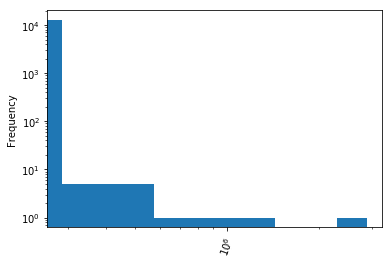

In [16]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# Describe the column
print(df['Existing Zoning Sqft'].describe())

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical

TypeError: unsupported operand type(s) for /: 'str' and 'int'

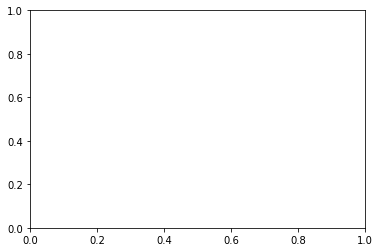

In [18]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='Initial Cost', by='Borough', rot=90)

# Display the plot
plt.show()